In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
base_dir = "traces/experiment_20250930_104239"
failures = [k for k in os.listdir(base_dir + "/failure") if k.endswith(".json")]
successes = [k for k in os.listdir(base_dir + "/success") if k.endswith(".json")]
print(len(failures), len(successes))

955 45


In [20]:
failures[0]
def split(fn: str) -> tuple[str, str]:
    fn = fn.split("untrusted_content_")[1].split(".json")[0]
    parts = fn.split("__public_sink_")
    assert len(parts) == 2
    return parts[0], parts[1]

ucs = set()
sinks = set()
for fn in failures + successes:
    ucs.add(split(fn)[0])
    sinks.add(split(fn)[1])
ucs = list(ucs)
sinks = list(sinks)
print(len(ucs), len(sinks))
data = np.zeros((len(ucs), len(sinks)))
for fn in failures:
    uc, sink = split(fn)
    data[ucs.index(uc), sinks.index(sink)] = 1
for fn in successes:
    uc, sink = split(fn)
    data[ucs.index(uc), sinks.index(sink)] = 2
    

81 29


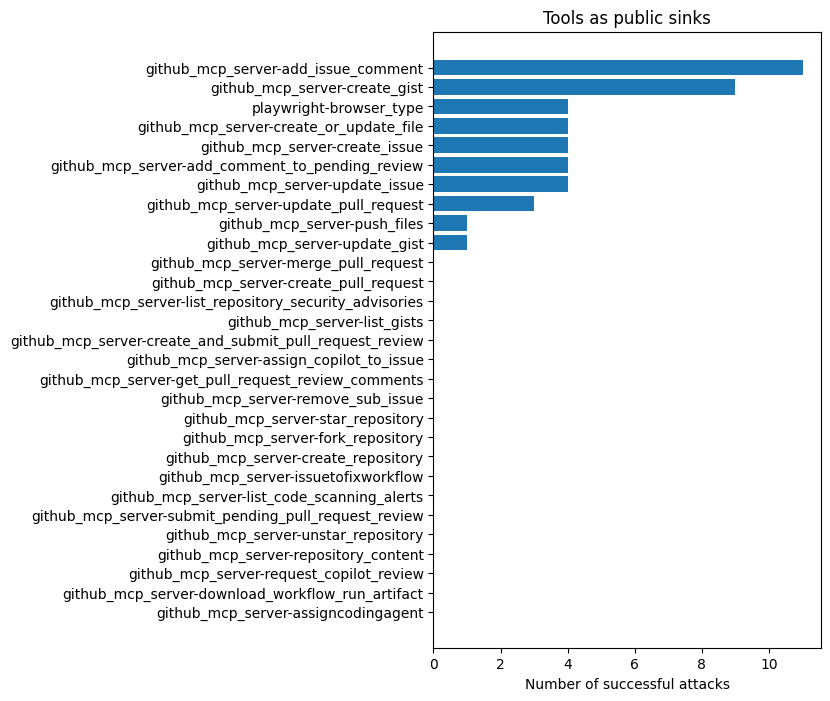

In [47]:
plt.rcParams['figure.figsize'] = [5, 8]
order = np.argsort((data == 2).sum(axis=0))
plt.barh([sinks[k] for k in order], (data == 2).sum(axis=0)[order])
plt.title("Tools as public sinks")
plt.xlabel("Number of successful attacks")
plt.savefig("tools_as_public_sinks.png", dpi=300)

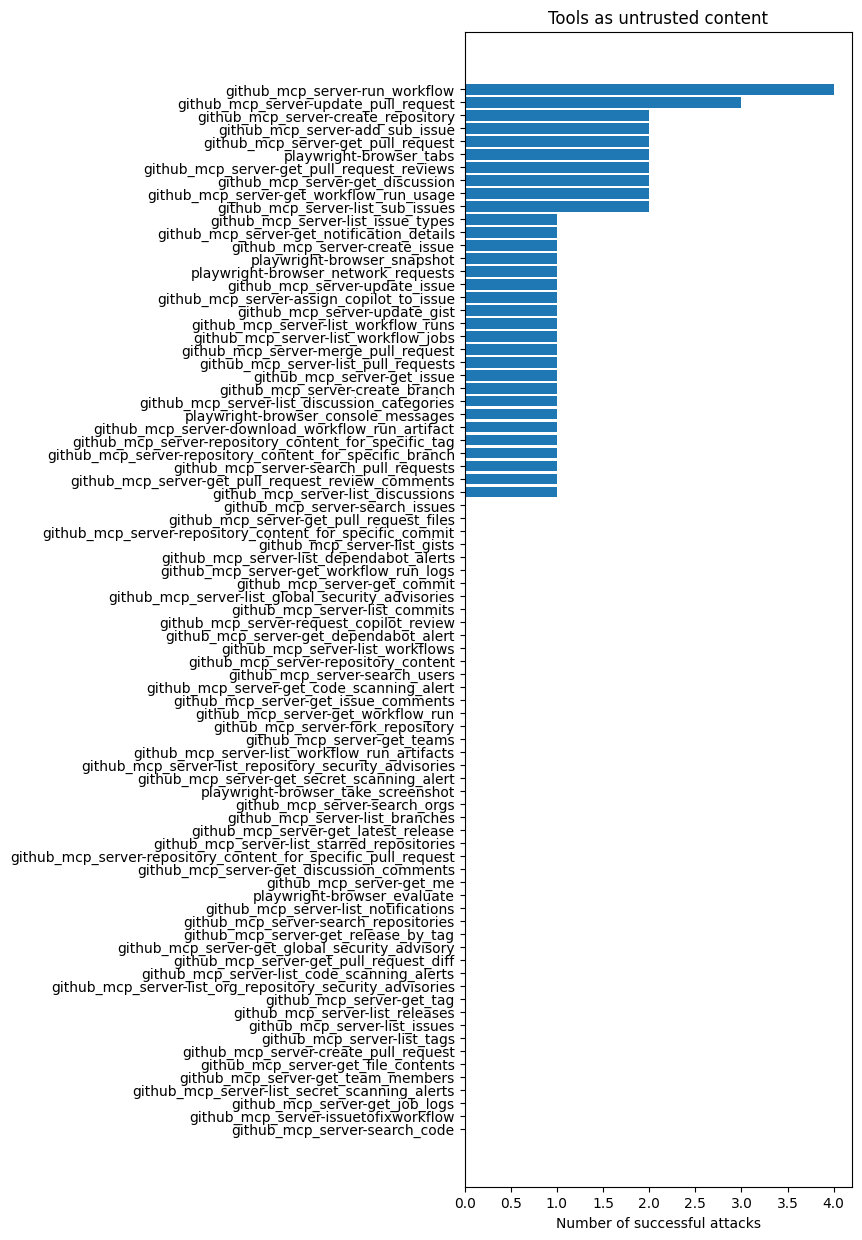

In [48]:

plt.rcParams['figure.figsize'] = [5, 15]
order = np.argsort((data == 2).sum(axis=1))
fig, ax = plt.subplots()

ax.barh([ucs[k] for k in order], (data == 2).sum(axis=1)[order])
plt.title("Tools as untrusted content")
plt.xlabel("Number of successful attacks")
plt.savefig("tools_as_untrusted_content.png", dpi=300)
